In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)

/tmp/ipykernel_23736/1474093429.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
random_state = 42

# Database

In [3]:
# X = [[0, 0], [1, 1]]
# Y = [0, 1]
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

In [4]:
database_name = 'student-mat.csv'
coluna_target = 'school'
if database_name:
    base = pd.read_csv(database_name, sep=';')
    X = base.drop(columns=coluna_target)
    y = base[[coluna_target]]

# Dataprep

In [5]:
X_og = X.copy()

# Mantendo apenas Variáveis Independentes Desejadas

In [6]:
accepted_features = [
    # 'age',
    # 'Medu',
    # 'Fedu'
]

if accepted_features:
    X = X[accepted_features]

# Tratando Variáveis Categóricas

In [7]:
num_features = X_og.describe().columns.tolist()

In [8]:
cat_features = X_og.drop(columns=num_features).columns.tolist()

In [9]:
# One-hot encoding
X = pd.get_dummies(X,
                   columns=cat_features,
                   drop_first=True)

# Tratando Missings e Outliers

In [10]:
#

## Dividir Base de Treino

In [11]:
train_size = 0.8

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    train_size=train_size,
                                                                    random_state=random_state)

# Inicializar Classificador

In [13]:
clf_dict = {
    'max_depth': 7, # Profundidade Máxima da Árvore
    #'min_samples_split': 2,  # Mínimo para haver split de nó
    #'min_samples_leaf': 1,  # Mínimo para ser nó de decisão
    'random_state': random_state,
}

In [14]:
clf = tree.DecisionTreeClassifier(**clf_dict)

# Train

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

# Predict

In [17]:
# y_pred = clf.predict([[2., 2.]])
y_pred = clf.predict(X_test)

In [18]:
# y_pred_probs  = clf.predict_proba([[2., 2.]])
y_pred_probs  = clf.predict_proba(X_test)

# Teste

In [19]:
classes = None # ['class 0', 'class 1']

In [20]:
accuracy = accuracy_score(y_test, y_pred)

In [21]:
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.85


In [22]:
results = classification_report(y_test,
                                y_pred,
                                target_names=classes)

In [23]:
print(results)

              precision    recall  f1-score   support

          GP       0.89      0.94      0.91        67
          MS       0.50      0.33      0.40        12

    accuracy                           0.85        79
   macro avg       0.69      0.64      0.66        79
weighted avg       0.83      0.85      0.84        79



# Teste de Validação Cruzada

In [24]:
metricas = {'acc': 'accuracy',
            'recall': 'recall_macro',
            'f1': 'f1_macro',
           }

In [25]:
# Validação de Cruzada de 5 dobras
k = 5  # Número de dobras
cv_scores = model_selection.cross_validate(clf,
                                            X,
                                            y,
                                            scoring=metricas,
                                            cv=k)

In [26]:
cv_scores

{'fit_time': array([0.01410532, 0.01346636, 0.00606847, 0.0065217 , 0.00784183]),
 'score_time': array([0.03904414, 0.02088237, 0.01655006, 0.02279902, 0.02014685]),
 'test_acc': array([0.91139241, 0.89873418, 0.87341772, 0.65822785, 0.6835443 ]),
 'test_recall': array([0.70793651, 0.65238095, 0.58968254, 0.61349206, 0.56231884]),
 'test_f1': array([0.74219114, 0.68650794, 0.60813492, 0.52356489, 0.52121212])}

In [27]:
mean_test_acc = np.mean(cv_scores['test_acc'])
std_test_acc = np.std(cv_scores['test_acc'])

In [28]:
print(f"Média de cross-validation para acc: {mean_test_acc:.2f}")
print(f"Desvio-padrão de cross-validation para acc: {std_test_acc:.2f}")

Média de cross-validation para acc: 0.81
Desvio-padrão de cross-validation para acc: 0.11


# Matriz de Confusão

In [29]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Matriz de Confusão')
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.show()

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)

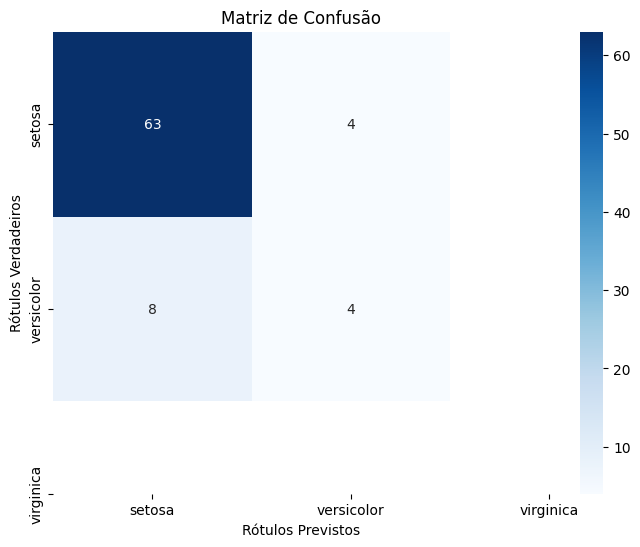

In [31]:
plot_confusion_matrix(conf_matrix, classes=iris.target_names)
